<a href="https://colab.research.google.com/github/pierthodo/temporal_regularization/blob/master/Simple_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import matplotlib


In [0]:

def get_bias():
    data = np.zeros((50,100,4))
    size = 10
    T = 5
    for p in range(100):
        dist = []
        dist_mod = []
        for i in range(50):
            matrix = np.random.rand(size,size)
            matrix = matrix/matrix.sum(axis=1)[:,None]
            matrix_t = (matrix.T/matrix.T.sum(axis=1)[:,None])
            matrix_t = matrix.dot(matrix_t)
            matrix_t_m = ((p+1)/100.0)*matrix_t + (1-((p+1)/100.0))*matrix

            reward = np.random.rand(size)
            reward_mod = copy.copy(reward)
            for u in range(3):
                for n in range(size):
                    ind = np.argpartition(matrix[:,n], -(u+2))[-(u+2):]
                    for s in range(u+2):
                        reward_mod[ind[s]] += (reward_mod[n] - reward_mod[ind[s]])/2

                sol_mod = np.linalg.solve(np.identity(size)-0.99*matrix,reward_mod)
                sol_2_mod = np.linalg.solve(np.identity(size)-0.99*matrix_t_m,reward_mod)
                data[i,p,u+1] = np.abs(sol_mod - sol_2_mod).mean()


            sol = np.linalg.solve(np.identity(size)-0.99*matrix,reward)
            sol_2 = np.linalg.solve(np.identity(size)-0.99*matrix_t_m,reward)
            data[i,p,0] = np.abs(sol - sol_2).mean()
    return data


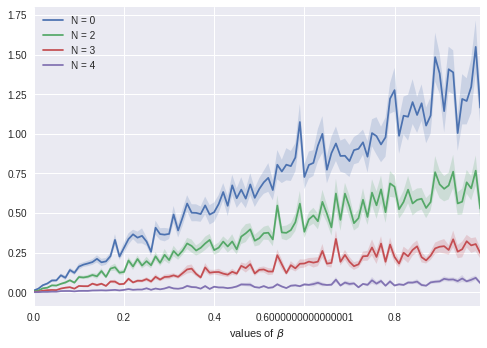

In [4]:
data = get_bias()
ax = sns.tsplot(data,condition=["N = 0","N = 2","N = 3","N = 4"])
ax.set_xlabel(r'values of $\beta$')
n = len(ax.xaxis.get_ticklabels())           
ax.set_xticklabels(np.linspace(0, 1, n))
plt.show()

Mixing time

In [0]:
def mixing():
    size = 10
    T = 5
    rep_list = np.empty((100,500,3))
    for rep in range(100):
        matrix = np.random.random(size=(size,size)).astype(np.float64)
        matrix = matrix/matrix.sum(axis=1)[:,None]
        pi = get_pi(matrix)
        matrix_s = np.diag(pi**(-1)).dot(matrix.T).dot(np.diag(pi))
        result = np.empty((100,500,3))
        for n in range(100):
            dist = []
            for b in range(100):
                for i in range(T):
                    m = (1-b/100)*matrix + (b/100)*matrix_s
                    dist.append([b/100,i,np.linalg.norm((np.ones(size)/size).dot(np.linalg.matrix_power(m,i+1))-pi)])
            dist = np.array(dist)
            result[n,:,:] = dist
        rep_list[rep,:,:] = result.mean(axis=0)
    dist= rep_list.mean(axis=0)
    return dist

In [11]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(8, 7))
ax = fig.gca(projection='3d')
ax.plot_trisurf(dist[:,0],dist[:,1], dist[:,2], linewidth=0.2)
ax.view_init(30, 30)
ax.set_yticks(np.arange(5))
ax.set_xlabel("Beta",labelpad=10)
ax.set_ylabel("Iteration",labelpad=10)
ax.set_zlabel("Error",labelpad=10)
plt.tight_layout()
plt.show()

ValueError: ignored